In [29]:
%reload_ext autoreload
%autoreload 2

In [30]:
from torch_snippets import *
from torch_snippets.torch_loader import Report
from torch_snippets.charts import alt
import torch
from icecream import ic
DF = pd.DataFrame

In [31]:
from layers import *

# Simple Regression

In [32]:
np.random.seed(10)
n = 5
x = np.linspace(-1, 1, num=n)

y = 5*x + 8

data = DF({'x':x, 'y':y})
data

,x,y
0,-1.0,3.0
1,-0.5,5.5
2,0.0,8.0
3,0.5,10.5
4,1.0,13.0


In [33]:
def viz(m=None):

    ys = ['y']

    if m is not None:
        x = data[['x']].values
        data['y1'] = m(x)
        ys.append('y1')
    cs = []
    for _y in ys:
        if _y == 'y':
            title = 'Training Data'
            color = 'blue'
        else:
            title = 'Model Prediction'
            color = 'red'

        c = alt.Chart(data, title=title).encode(x='x', y=_y)
        c = c.mark_line(color=color) + c.mark_point(color=color)
        print(_y, title)
        cs.append(c.interactive())
        try:
            # C = (C | c).resolve_scale(y='shared', x='shared')
            C = C + c
        except:
            C = c
        
    show(C.interactive())

viz()

y Training Data


alt.LayerChart(...)

In [34]:
simple_neuron = Linear(1, 1)
viz(simple_neuron)

y Training Data
y1 Model Prediction


alt.LayerChart(...)

In [35]:
iters = 1000
nshows = 10

loss_fn = MSE()
report = Report(iters)

In [36]:
np.random.seed(10)
inputs = ['x']
simple_neuron = Linear(1, 1)
ic(simple_neuron);
viz(simple_neuron)

max_lr = 1e-2
# get_lr = lambda _iter: max_lr * (1+np.cos(np.pi*(_iter/iters)))/2
get_lr = lambda _iter: max_lr

for _iter in range(iters):
    x, y = data[inputs].values, data['y'].values[:,None]
    y_hat = simple_neuron(x)
    loss = loss_fn(y, y_hat)
    grads = loss_fn.backward(loss)
    simple_neuron.backward(grads)
    lr = get_lr(_iter)
    simple_neuron.update(lr)
    report.record(_iter+1, loss=loss, lr=lr, end='\r')
    if _iter % (iters//nshows) == 0:
        viz(simple_neuron)
viz(simple_neuron)

ic| simple_neuron: linear layer (y = 
                   [[1.3315865]]x + [0.71527897])


y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 1.000  loss: 59.796  lr: 0.010  (3.72s - 3717.38s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 101.000  loss: 0.461  lr: 0.010  (3.78s - 33.64s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 201.000  loss: 0.239  lr: 0.010  (3.83s - 15.22s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 301.000  loss: 0.162  lr: 0.010  (3.93s - 9.13s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 401.000  loss: 0.122  lr: 0.010  (3.97s - 5.93s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 501.000  loss: 0.098  lr: 0.010  (4.07s - 4.05s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 601.000  loss: 0.082  lr: 0.010  (4.12s - 2.74s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 701.000  loss: 0.070  lr: 0.010  (4.19s - 1.79s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 801.000  loss: 0.062  lr: 0.010  (4.24s - 1.05s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 901.000  loss: 0.055  lr: 0.010  (4.31s - 0.47s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

EPOCH: 1000.000  loss: 0.050  lr: 0.010  (4.37s - 0.00s remaining)y Training Data
y1 Model Prediction


alt.LayerChart(...)

In [37]:
print(simple_neuron)

linear layer (y = 
[[5.00260485]]x + [7.77756723])


# Multi-Linear Regression

In [56]:
np.random.seed(10)
n = 10000
x1 = np.random.normal(size=n).clip(-2, 1)
x2 = np.random.normal(size=n).clip(-2, 1)
x3 = np.random.normal(size=n).clip(-2, 1)
x4 = np.random.normal(size=n).clip(-2, 1)

y = 5*x1 + 3*x2 - 1*x3 - 4*x4 - 2

data = DF({'x1':x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y':y})
data.sample(5)

,x1,x2,x3,x4,y
3479,-0.240630,0.122037,-0.879703,1.000000,-5.957339
1295,-1.340882,0.410806,-0.365992,-0.443592,-5.331633
7172,0.221957,0.835404,-0.560482,1.000000,-1.823518
4072,-1.377846,-0.654889,0.288644,-0.478950,-9.226742
766,-0.549648,-0.679633,-1.823021,0.319311,-6.241359


In [57]:
np.random.seed(10)
inputs = 'x1,x2,x3,x4'.split(',')
m = Linear(4, 1)
print(m)
iters = 10000

max_lr = 1e-3
get_lr = lambda _iter: max_lr * (1+np.cos(np.pi*(_iter/iters)))/2
# get_lr = lambda _iter: lr
loss_fn = MSE()
report = Report(iters)

for _iter in range(iters):
    _df = data.sample(64)
    x, y = _df[inputs].values, _df['y'].values[:,None]
    y_hat = m(x)
    loss = loss_fn(y, y_hat)
    grads = loss_fn.backward(loss)
    m.backward(grads)
    lr = get_lr(_iter)
    m.update(lr)
    report.record(_iter+1, loss=loss, lr=lr, end='\r')

linear layer (y = 
[[ 1.3315865 ]
 [ 0.71527897]
 [-1.54540029]
 [-0.00838385]]x + [0.62133597])
EPOCH: 10000.000  loss: 0.105  lr: 0.000  (2.77s - 0.00s remaining)

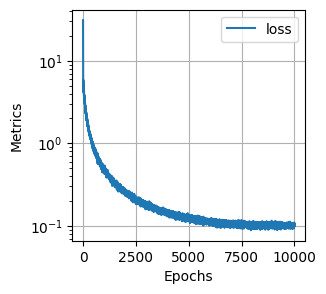

In [64]:
report.plot('loss', log=True)

---

# Classification

In [51]:
n = 10000
x1, x2 = np.random.normal(size=n), np.random.normal(size=n)
y = (x1*x2 > 0).astype(int)
data = DF({'x1':x1, 'x2':x2, 'y':y})
data.sample(5)

,x1,x2,y
6997,-0.827077,0.053750,0
2792,-1.736743,-0.148088,1
7083,-2.468389,0.912025,0
5978,-0.768991,1.181010,0
5243,0.625464,-0.555203,0


In [52]:
def vis(data, ys):
    charts = []
    for _y in ys:
        chart = (
            alt.Chart(data.sample(frac=0.1))
            .mark_point()
            .encode(x='x1:Q',y='x2:Q',color=f'{_y}:N')
        )
        charts.append(chart)
    c = charts[0]
    for _c in charts[1:]: c = c|_c
    show(c)

In [53]:
vis(data, ys=['y'])

alt.Chart(...)

In [54]:
m = Sequential(
    Linear(2, 16),
    ReLU(),
    Linear(16, 16),
    ReLU(),
    Linear(16, 1),
    Sigmoid(),
)

data['y1'] = (m(data.iloc[:,:2]) > 0.5).astype(int)

iters = 3000
max_lr = 1e-3
get_lr = lambda _iter: max_lr * (1+np.cos(np.pi*(_iter/iters)))/2

loss_fn = BCE()
report = Report(iters)

for _iter in range(iters):
    _df = data.sample(64)
    x, y = _df.iloc[:, :2].values, _df['y'].values[:,None]
    y_hat = m(x)
    loss = loss_fn(y, y_hat)
    grads = loss_fn.backward(loss)
    m.backward(grads)
    m.update(get_lr(_iter))
    report.record(_iter+1, loss=loss, end='\r')


EPOCH: 3000.000  loss: 0.103  (0.83s - 0.00s remaining)

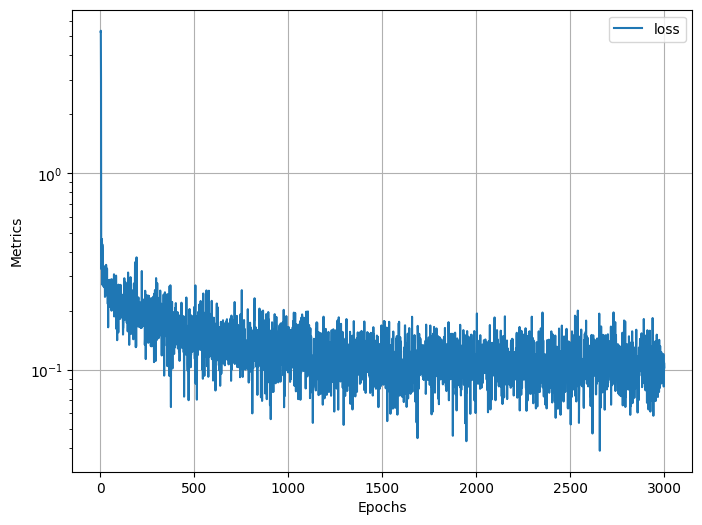

In [16]:
report.plot(log=True)

In [17]:
data['y2'] = (m(data.iloc[:,:2]) > 0.5).astype(int)

In [18]:
vis(data, ['y1','y2'])

alt.HConcatChart(...)